In [4]:
pip install catboost

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data=pd.read_csv('House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [8]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4741 non-null   float64
 3   Size               4738 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4739 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4742 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


In [10]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.741000e+03,4738.000000,4742.000000
mean,2.083860,3.502340e+04,967.936049,1.965837
std,0.832256,7.814214e+04,634.562635,0.884904
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [11]:
data.isnull().sum()

,0
Posted On,0
BHK,0
Rent,5
Size,8
Floor,0
Area Type,7
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [12]:
data['Posted On']= pd.to_datetime(data['Posted On'])

In [13]:
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
print('lenght of numerical columns ',len(num_cols))
print('lenght of catgorical columns ',len(cat_cols))

lenght of numerical columns  4
lenght of catgorical columns  7


In [14]:
for i in cat_cols:
    print(i,':',data[i].unique())

Floor : ['Ground out of 2' '1 out of 3' '1 out of 2' 'Ground out of 1'
 'Ground out of 4' '1 out of 4' '1 out of 1' 'Ground out of 3'
 '2 out of 3' '4 out of 5' '2 out of 2' '2 out of 5' '4 out of 14'
 '3 out of 3' '5 out of 5' '4 out of 4' '7 out of 8' '2 out of 4'
 '3 out of 4' '1 out of 5' '8 out of 5' 'Ground out of 6' '2 out of 1'
 'Upper Basement out of 4' 'Ground out of 5' '3 out of 5' '11 out of 19'
 '5 out of 10' '11 out of 14' 'Lower Basement out of 2' '2 out of 7'
 '4 out of 10' '7 out of 10' '2 out of 13' '6 out of 7' '4 out of 7'
 '14 out of 14' '43 out of 78' '2 out of 8' '13 out of 18' '5 out of 12'
 '18 out of 24' '3 out of 7' '17 out of 31' '11 out of 21' '7 out of 19'
 '14 out of 23' '9 out of 20' 'Upper Basement out of 9' '19 out of 24'
 '3 out of 21' '1 out of 22' '8 out of 8' '6 out of 12' '4 out of 58'
 'Upper Basement out of 16' '60 out of 66' '34 out of 48' '5 out of 8'
 '5 out of 14' '14 out of 40' '5 out of 7' '9 out of 22' '12 out of 18'
 '26 out of 44' '1 ou

In [15]:
df=data.copy()

In [16]:
data['Floor'].value_counts()
data['number_of_floors'] = data['Floor'].apply(lambda x: str(x).split(' ')[-1])
data['number_of_floors'].value_counts()
data['current_floor'] = data['Floor'].apply(lambda x: str(x).split(' ')[0])
data['current_floor'].value_counts()

,count
current_floor,
1,1161
2,945
Ground,927
3,512
4,272
5,164
6,93
7,74
10,67


In [17]:
def convert_floor(value):

    if value == 'Ground':
        return 0
    elif value == 'Lower':
        return -1
    elif value == 'Upper':
        return -0.5
    elif value.isdigit():
        return int(value)
    else:
        return None

data['current_floor'] = data['current_floor'].apply(convert_floor)
data['number_of_floors']=data['number_of_floors'].replace({'Ground': 0})

<Axes: title={'center': 'Current Floor Distribution'}, xlabel='current_floor'>

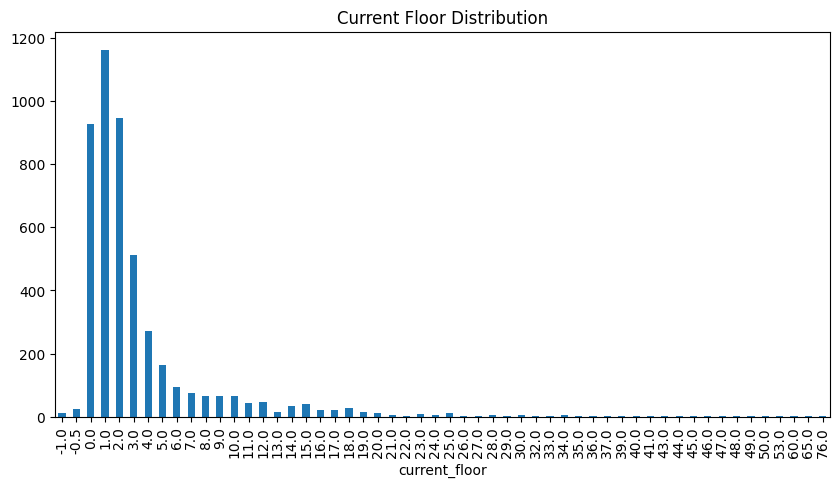

In [18]:
data['current_floor'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), title='Current Floor Distribution')

In [19]:
data.drop(columns=['Floor'],inplace=  True)

In [20]:
data['current_floor']=data['current_floor'].astype(int)
data['number_of_floors']=data['number_of_floors'].astype(int)

In [21]:
data.isnull().sum()

,0
Posted On,0
BHK,0
Rent,5
Size,8
Area Type,7
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0
Bathroom,4


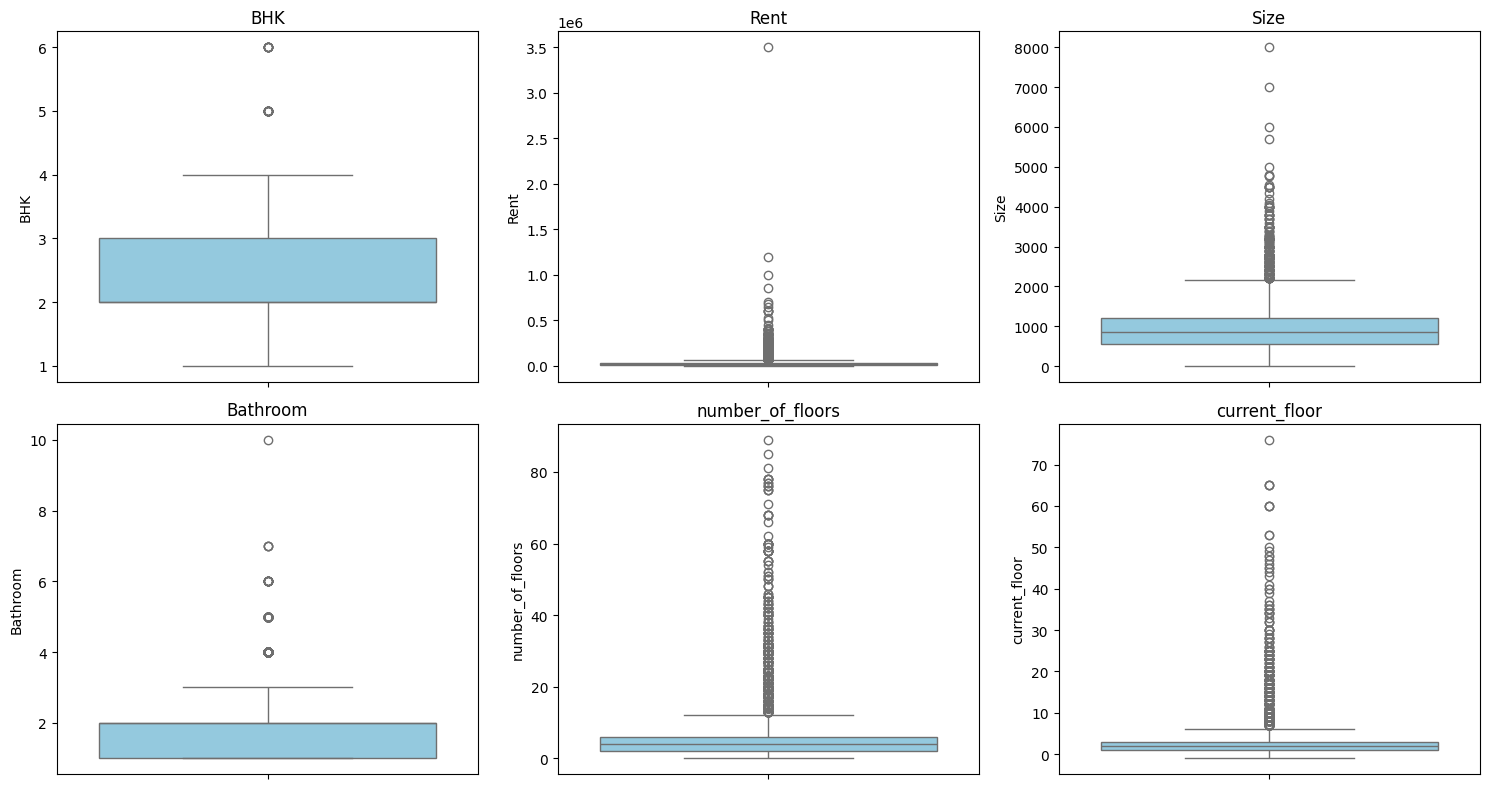

In [22]:
numeric_cols = data.select_dtypes(include=['number']).columns

# Determine rows and columns based on number of features
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Round up

# Create the figure
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through each column and plot
for idx, col in enumerate(numeric_cols, start=1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(col, fontsize=12)
    plt.tight_layout()

plt.show()

<Axes: xlabel='Rent', ylabel='Furnishing Status'>

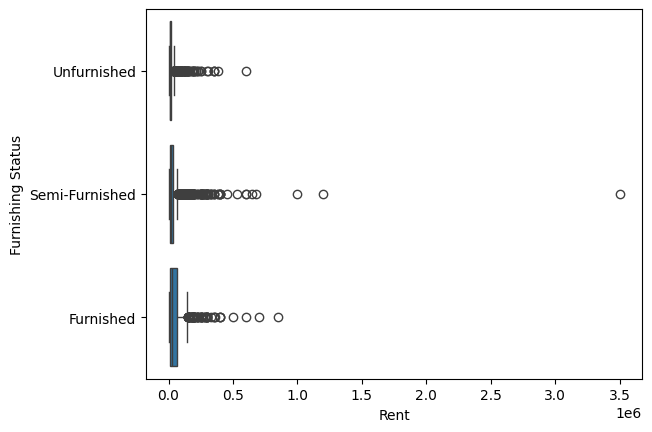

In [23]:
sns.boxplot(data=data,x='Rent',y='Furnishing Status')

<Axes: xlabel='Rent', ylabel='Area Type'>

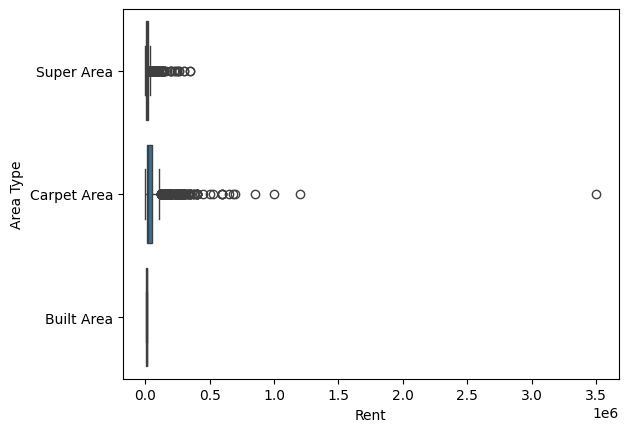

In [24]:
sns.boxplot(data=data,x='Rent',y='Area Type')

In [25]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
data['Rent'] = imputer.fit_transform(data[['Rent']])
data['Size'] = imputer.fit_transform(data[['Size']])
data['Area Type']  = data['Area Type'].fillna(data['Area Type'].mode()[0])
data['Bathroom']= imputer.fit_transform(data[['Bathroom']])

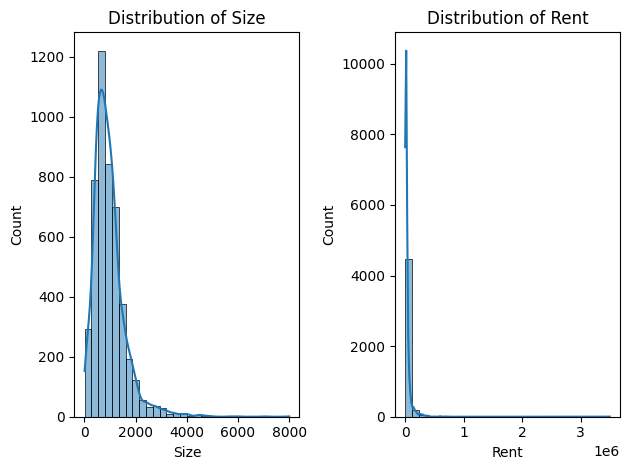

In [26]:
for idx,i in enumerate(['Size','Rent'],start=1):
    plt.subplot(1,2,idx)
    sns.histplot(data[i], kde=True, bins=30)
    plt.title(f'Distribution of {i}')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Area Location Distribution with Rent'}, xlabel='Area Locality'>

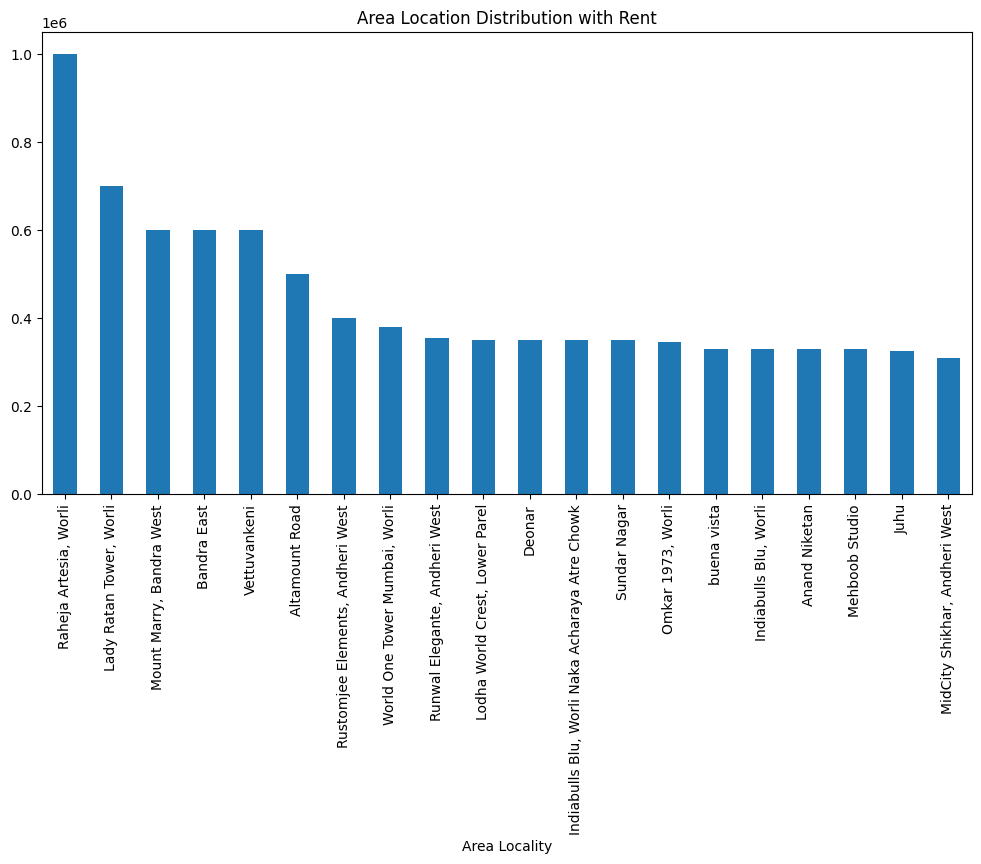

In [27]:
data.groupby('Area Locality')['Rent'].median().sort_values(ascending=False).head(20).plot(kind='bar', figsize=(12, 6), title='Area Location Distribution with Rent')

<Axes: title={'center': 'Area Type Distribution with Rent'}, xlabel='Area Type'>

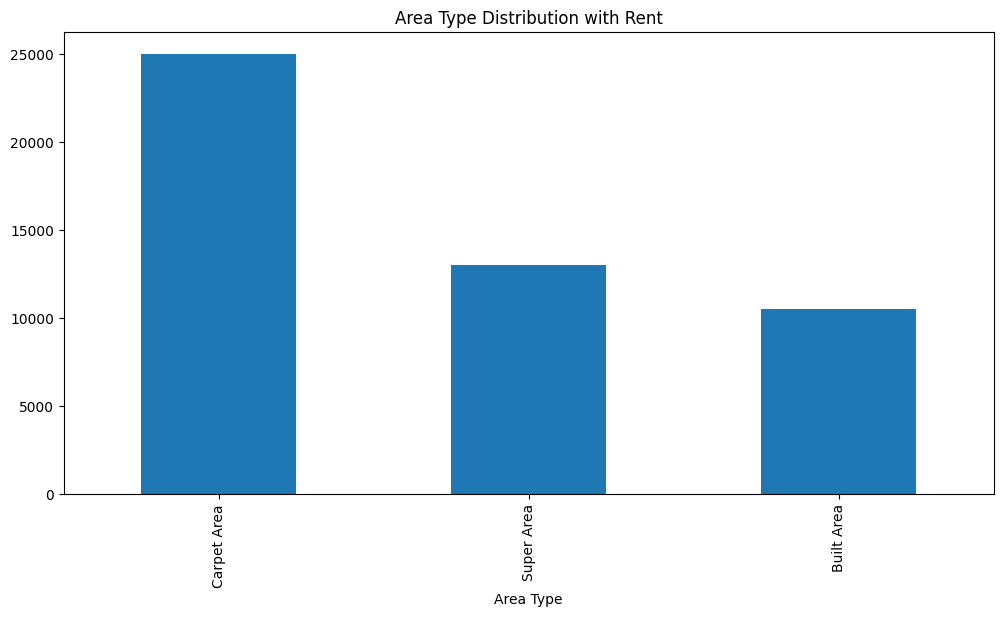

In [28]:
data.groupby('Area Type')['Rent'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), title='Area Type Distribution with Rent')

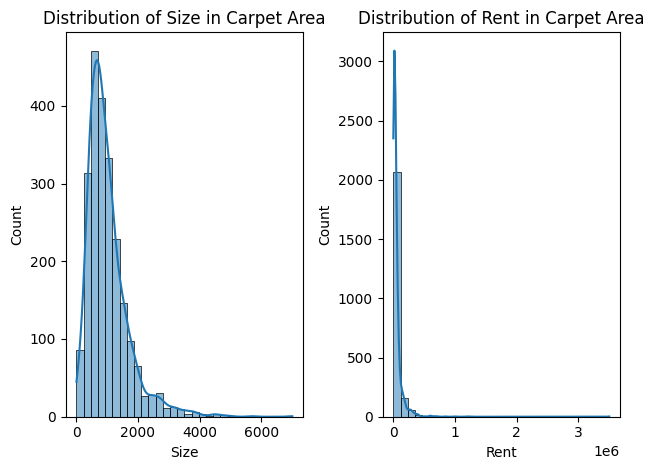

In [29]:
carpet_area=data[data['Area Type']=='Carpet Area']  # Example condition, adjust as needed
super_area=data[data['Area Type']=='Super Area']
built_area=data[data['Area Type']=='Built Area']
for idx,i in enumerate(['Size','Rent'],start=1):
    plt.subplot(1,2,idx)
    sns.histplot(carpet_area[i], kde=True, bins=30)
    plt.title(f'Distribution of {i} in Carpet Area')

plt.tight_layout()
plt.show()


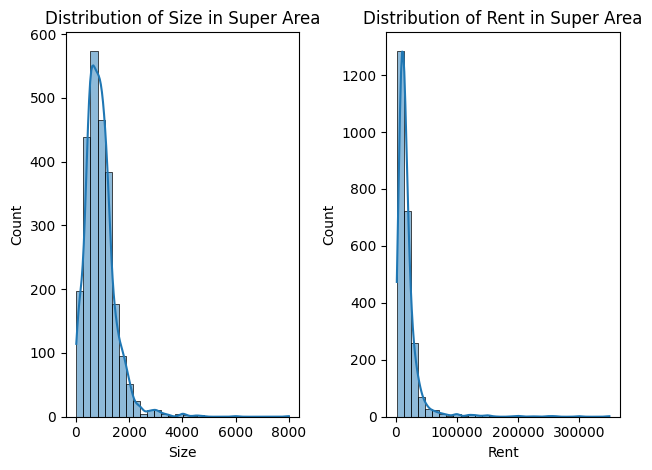

In [30]:
for idx,i in enumerate(['Size','Rent'],start=1):
    plt.subplot(1,2,idx)
    sns.histplot(super_area[i], kde=True, bins=30)
    plt.title(f'Distribution of {i} in Super Area')

plt.tight_layout()
plt.show()

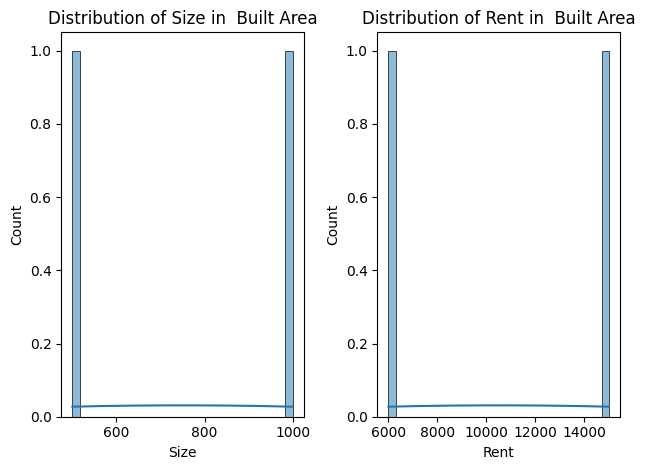

In [31]:
for idx,i in enumerate(['Size','Rent'],start=1):
    plt.subplot(1,2,idx)
    sns.histplot(built_area[i], kde=True, bins=30)
    plt.title(f'Distribution of {i} in  Built Area')

plt.tight_layout()
plt.show()

In [32]:
def cap_outliers(df):
    df = df.copy()
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                  np.where(df[col] > upper, upper, df[col]))
    return df
data=cap_outliers(data)

In [33]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler(feature_range=(0,850.0))
data['Size'] = min_max.fit_transform(data[['Size']])


In [34]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
data['Furnishing Status']=data['Furnishing Status'].replace({'Furnished': 2, 'Semi-Furnished': 1, 'Unfurnished': 0})
data['Area Type']=le.fit_transform(data['Area Type'])
data['Area Locality']=le.fit_transform(data['Area Locality'])
data['City']=le.fit_transform(data['City'])
data['Tenant Preferred']= le.fit_transform(data['Tenant Preferred'])
data['Point of Contact']=le.fit_transform(data['Point of Contact'])

/tmp/ipython-input-1205652748.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Furnishing Status']=data['Furnishing Status'].replace({'Furnished': 2, 'Semi-Furnished': 1, 'Unfurnished': 0})


<Axes: >

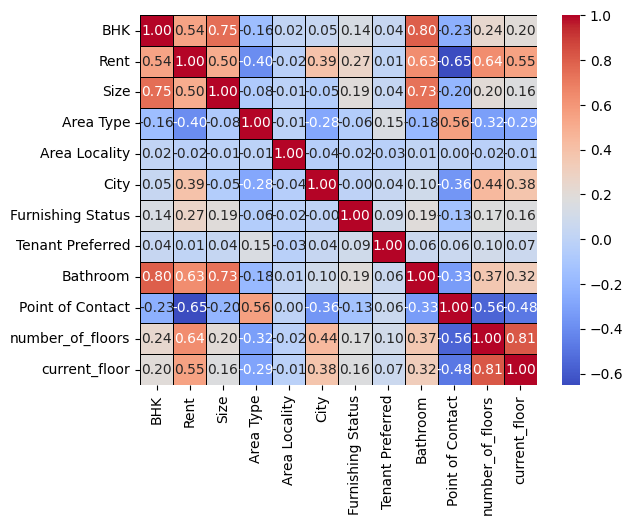

In [35]:
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')

In [36]:
data.drop(columns=['Area Locality','Posted On'],axis=1, inplace=True)

In [37]:
x= data.drop(columns=['Rent'])
y= data['Rent']
y=np.log10(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2_score(y_test, y_pred)}')


Mean Absolute Error: 0.13438629868363178
Mean Squared Error: 0.02949951172311556
Root Mean Squared Error: 0.17175421893832932
R-squared: 0.7331099116511697


In [39]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor


In [40]:

class modelling:
    def __init__(self, model, x_test, y_test, x_train, y_train,model_name):
        self.model = model
        self.x_test = x_test
        self.y_test = y_test
        self.x_train = x_train
        self.y_train = y_train
        self.model_name=model_name

    def models_evaluation(self):
        self.model.fit(self.x_train, self.y_train)
        y_pred = self.model.predict(self.x_test)

        mae = mean_absolute_error(self.y_test, y_pred)
        mse = mean_squared_error(self.y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(self.y_test, y_pred)

        train_score = self.model.score(self.x_train, self.y_train)
        test_score = self.model.score(self.x_test, self.y_test)

        self.evaluation_results = {
            'Train Score': train_score,
            'Test Score': test_score,
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'R-squared': r2
        }

        return self.evaluation_results

    def make_dataframe(self):
        if not hasattr(self, 'evaluation_results'):
            raise ValueError("You must run models_evaluation() before calling make_dataframe()")

        df = pd.DataFrame([self.evaluation_results])
        return df


    def make_plot_model(self):
        y_pred = self.model.predict(self.x_test)
        y_pred_inv = 10 ** y_pred
        y_test_inv = 10 ** self.y_test
        plt.figure(figsize=(7, 5))
        plt.scatter(y_test_inv, y_pred_inv, alpha=0.5, color='royalblue')
        plt.plot([y_test_inv.min(), y_test_inv.max()],
                 [y_test_inv.min(), y_test_inv.max()], 'r--', lw=2)
        plt.xlabel('Actual Rent')
        plt.ylabel('Predicted Rent')
        plt.title(f'Actual vs Predicted Rent: {self.model_name}')
        plt.show()


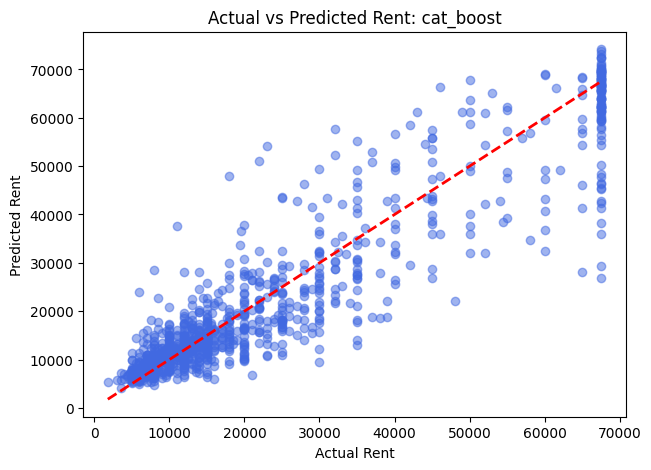

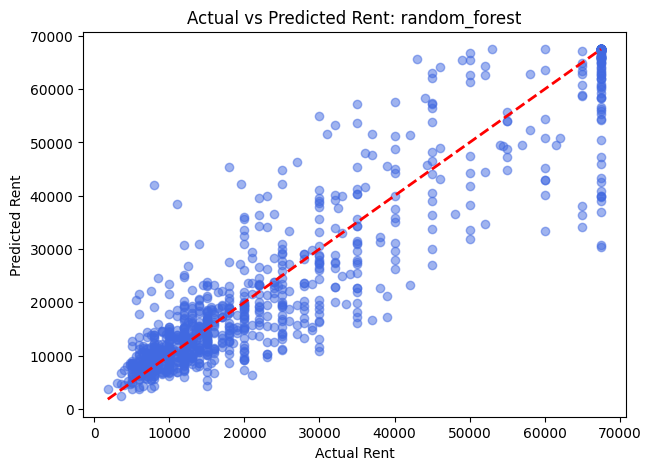

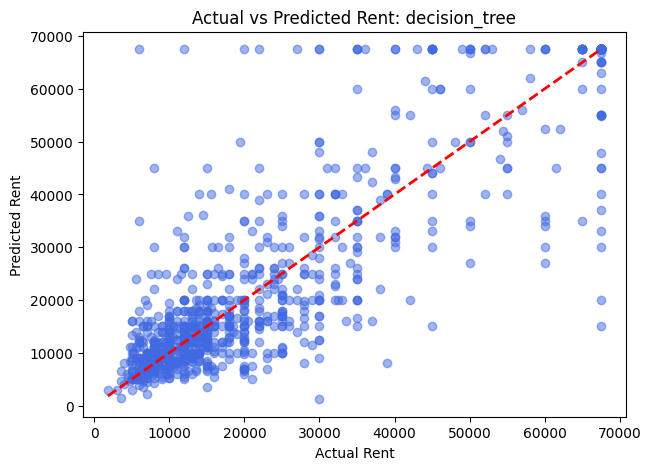

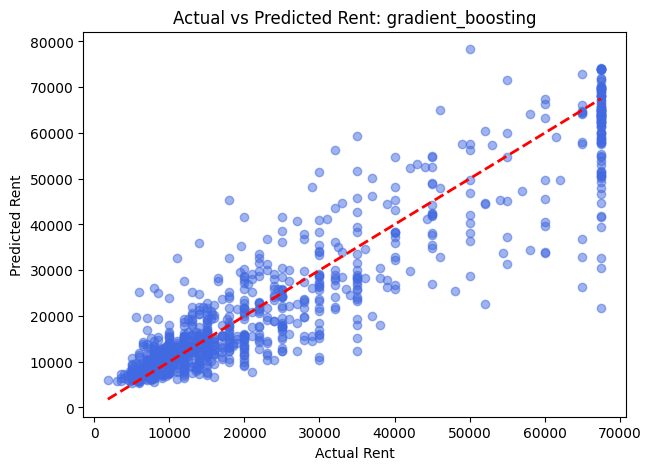

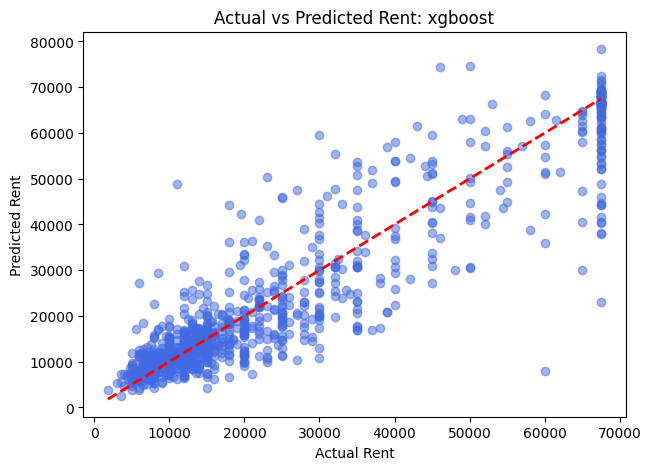

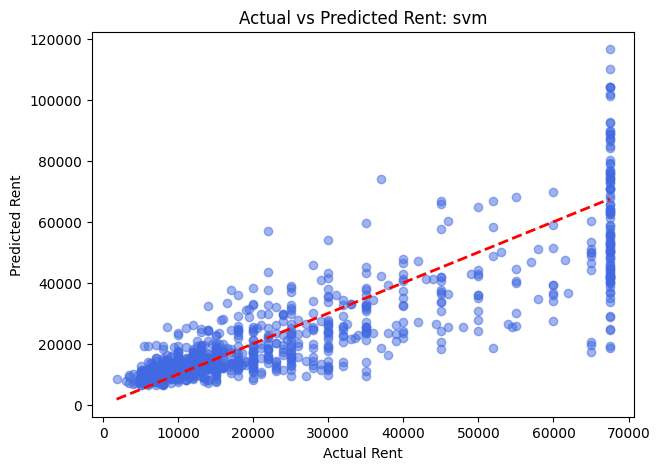

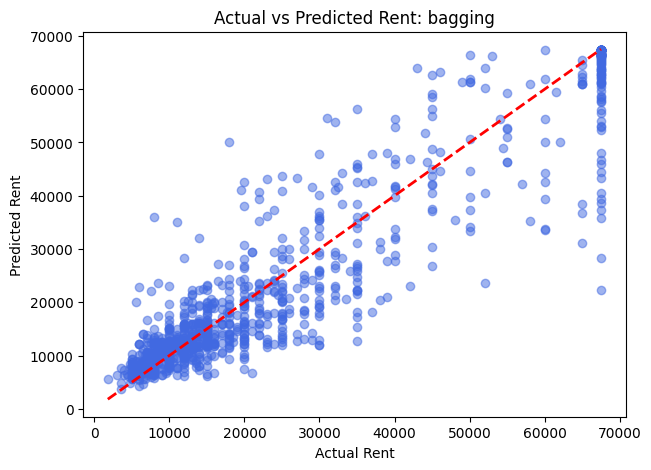

In [41]:
models={'cat_boost': CatBoostRegressor(iterations=200, random_state=42, verbose=0),
    'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
         'decision_tree': DecisionTreeRegressor(random_state=42),
         'gradient_boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
         'xgboost': XGBRegressor(n_estimators=100, random_state=42),
         'svm':SVR(kernel='linear',C=0.001),
        'bagging':BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=8),
    n_estimators=100,
    random_state=42
)
         }

models_results={}
for model_name,model in models.items():
    model=modelling(model, x_test, y_test, x_train, y_train,model_name)
    models_results[model_name]=model.models_evaluation()
    model.make_plot_model()


In [42]:
pd.DataFrame(models_results)

,cat_boost,random_forest,decision_tree,gradient_boosting,xgboost,svm,bagging
Train Score,0.886137,0.966084,0.993306,0.827097,0.940139,0.705686,0.862119
Test Score,0.819662,0.798688,0.656461,0.813189,0.799634,0.729348,0.809256
Mean Absolute Error,0.105533,0.110557,0.134723,0.108165,0.109103,0.135655,0.108698
Mean Squared Error,0.019933,0.022251,0.037972,0.020648,0.022147,0.029915,0.021083
Root Mean Squared Error,0.141184,0.149168,0.194863,0.143695,0.148817,0.172960,0.145200
R-squared,0.819662,0.798688,0.656461,0.813189,0.799634,0.729348,0.809256


In [43]:
catboost_param_grid = {
    'depth': [4, 6],
    'learning_rate': [0.03, 0.1],
    'iterations': [100, 200]
}

cat_boost_grid = GridSearchCV(
    estimator=CatBoostRegressor(),
    param_grid=catboost_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)

cat_boost_grid.fit(x_train,y_train)
best_catboost=cat_boost_grid.best_estimator_
gboost_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}



gboost_grid = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=gboost_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
gboost_grid.fit(x_train, y_train)
best_gboost = gboost_grid.best_estimator_

0:	learn: 0.3154690	total: 1.57ms	remaining: 312ms
1:	learn: 0.2952493	total: 2.69ms	remaining: 267ms
2:	learn: 0.2766310	total: 3.84ms	remaining: 252ms
3:	learn: 0.2607091	total: 4.8ms	remaining: 235ms
4:	learn: 0.2474491	total: 6ms	remaining: 234ms
5:	learn: 0.2344364	total: 7.16ms	remaining: 232ms
6:	learn: 0.2237236	total: 8.32ms	remaining: 229ms
7:	learn: 0.2141940	total: 9.45ms	remaining: 227ms
8:	learn: 0.2072769	total: 10.5ms	remaining: 223ms
9:	learn: 0.1995086	total: 11.6ms	remaining: 220ms
10:	learn: 0.1932206	total: 12.7ms	remaining: 218ms
11:	learn: 0.1876468	total: 13.8ms	remaining: 216ms
12:	learn: 0.1830305	total: 15ms	remaining: 215ms
13:	learn: 0.1798945	total: 15.8ms	remaining: 210ms
14:	learn: 0.1764532	total: 16.9ms	remaining: 209ms
15:	learn: 0.1734968	total: 18.2ms	remaining: 209ms
16:	learn: 0.1702997	total: 19.4ms	remaining: 208ms
17:	learn: 0.1674881	total: 20.5ms	remaining: 208ms
18:	learn: 0.1653380	total: 21.7ms	remaining: 207ms
19:	learn: 0.1634499	total: 

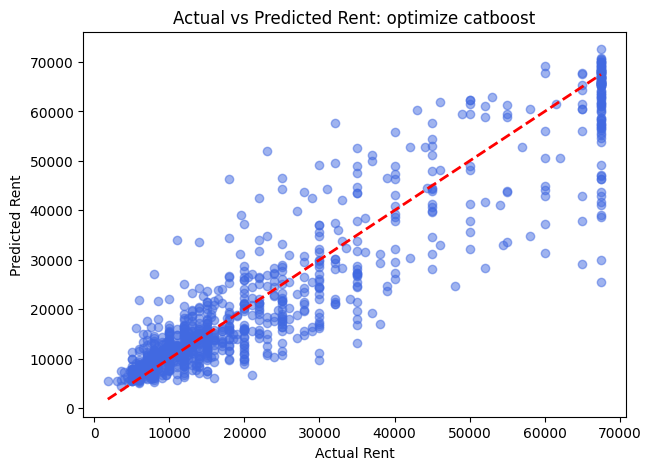

In [44]:
catboost=modelling(best_catboost, x_test, y_test, x_train, y_train,'optimize catboost')

catboost.make_plot_model()


In [45]:
catboost.models_evaluation()

0:	learn: 0.3154690	total: 2.03ms	remaining: 403ms
1:	learn: 0.2952493	total: 6.11ms	remaining: 605ms
2:	learn: 0.2766310	total: 7.83ms	remaining: 514ms
3:	learn: 0.2607091	total: 13.5ms	remaining: 662ms
4:	learn: 0.2474491	total: 15.3ms	remaining: 598ms
5:	learn: 0.2344364	total: 20.9ms	remaining: 676ms
6:	learn: 0.2237236	total: 22.7ms	remaining: 625ms
7:	learn: 0.2141940	total: 27.1ms	remaining: 652ms
8:	learn: 0.2072769	total: 28.3ms	remaining: 601ms
9:	learn: 0.1995086	total: 29.6ms	remaining: 562ms
10:	learn: 0.1932206	total: 30.6ms	remaining: 526ms
11:	learn: 0.1876468	total: 31.8ms	remaining: 498ms
12:	learn: 0.1830305	total: 32.8ms	remaining: 472ms
13:	learn: 0.1798945	total: 34.9ms	remaining: 463ms
14:	learn: 0.1764532	total: 36.6ms	remaining: 451ms
15:	learn: 0.1734968	total: 38.1ms	remaining: 438ms
16:	learn: 0.1702997	total: 39.6ms	remaining: 427ms
17:	learn: 0.1674881	total: 41.2ms	remaining: 416ms
18:	learn: 0.1653380	total: 46.8ms	remaining: 446ms
19:	learn: 0.1634499	t

{'Train Score': np.float64(0.8642730786058077),
 'Test Score': np.float64(0.8206494795773579),
 'Mean Absolute Error': 0.1053268512415345,
 'Mean Squared Error': 0.01982371399585096,
 'Root Mean Squared Error': np.float64(0.14079671159459287),
 'R-squared': 0.8206494795773579}

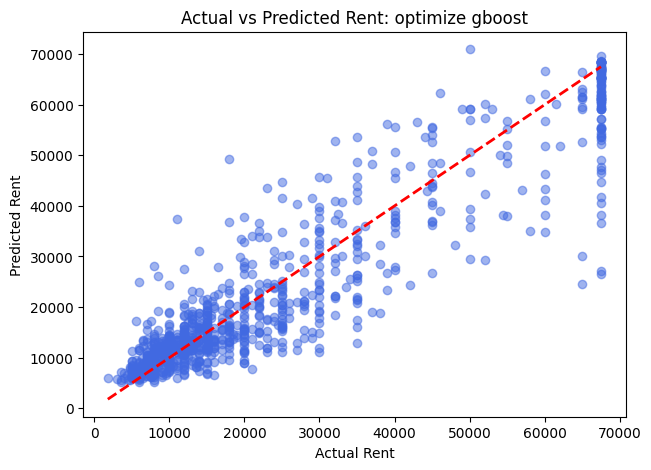

In [46]:
gboost=modelling(best_gboost, x_test, y_test, x_train, y_train,'optimize gboost')

gboost.make_plot_model()


In [47]:
gboost.models_evaluation()

{'Train Score': 0.8585308303559392,
 'Test Score': 0.816958538846881,
 'Mean Absolute Error': 0.10675886203321504,
 'Mean Squared Error': 0.020231675752773605,
 'Root Mean Squared Error': np.float64(0.14223809529367865),
 'R-squared': 0.816958538846881}

In [48]:
catboost.models_evaluation()

0:	learn: 0.3154690	total: 1.34ms	remaining: 268ms
1:	learn: 0.2952493	total: 2.58ms	remaining: 255ms
2:	learn: 0.2766310	total: 3.81ms	remaining: 250ms
3:	learn: 0.2607091	total: 4.75ms	remaining: 233ms
4:	learn: 0.2474491	total: 5.96ms	remaining: 232ms
5:	learn: 0.2344364	total: 7.11ms	remaining: 230ms
6:	learn: 0.2237236	total: 8.13ms	remaining: 224ms
7:	learn: 0.2141940	total: 9.18ms	remaining: 220ms
8:	learn: 0.2072769	total: 10.3ms	remaining: 218ms
9:	learn: 0.1995086	total: 11.5ms	remaining: 218ms
10:	learn: 0.1932206	total: 12.5ms	remaining: 215ms
11:	learn: 0.1876468	total: 13.7ms	remaining: 214ms
12:	learn: 0.1830305	total: 14.8ms	remaining: 213ms
13:	learn: 0.1798945	total: 15.6ms	remaining: 208ms
14:	learn: 0.1764532	total: 16.7ms	remaining: 206ms
15:	learn: 0.1734968	total: 18.4ms	remaining: 212ms
16:	learn: 0.1702997	total: 19.8ms	remaining: 213ms
17:	learn: 0.1674881	total: 21.2ms	remaining: 214ms
18:	learn: 0.1653380	total: 22.5ms	remaining: 215ms
19:	learn: 0.1634499	t

{'Train Score': np.float64(0.8642730786058077),
 'Test Score': np.float64(0.8206494795773579),
 'Mean Absolute Error': 0.1053268512415345,
 'Mean Squared Error': 0.01982371399585096,
 'Root Mean Squared Error': np.float64(0.14079671159459287),
 'R-squared': 0.8206494795773579}

In [49]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(
    estimator=best_catboost,
    step=1,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


rfecv.fit(x_train, y_train)


print("Selected features:", list(x_train.columns[rfecv.support_]))


refcvc = modelling(rfecv,x_test, y_test, x_train, y_train,'recursive with catboost')
refcvc.models_evaluation()


0:	learn: 0.3154690	total: 4.01ms	remaining: 798ms
1:	learn: 0.2952493	total: 9.82ms	remaining: 972ms
2:	learn: 0.2766310	total: 11.5ms	remaining: 754ms
3:	learn: 0.2607091	total: 22.8ms	remaining: 1.12s
4:	learn: 0.2474491	total: 27.5ms	remaining: 1.07s
5:	learn: 0.2344364	total: 31.6ms	remaining: 1.02s
6:	learn: 0.2237236	total: 40.7ms	remaining: 1.12s
7:	learn: 0.2141940	total: 43ms	remaining: 1.03s
8:	learn: 0.2072769	total: 47.5ms	remaining: 1.01s
9:	learn: 0.1995086	total: 51.5ms	remaining: 978ms
10:	learn: 0.1932206	total: 53.2ms	remaining: 915ms
11:	learn: 0.1876468	total: 62.1ms	remaining: 973ms
12:	learn: 0.1830305	total: 71.1ms	remaining: 1.02s
13:	learn: 0.1798945	total: 72.6ms	remaining: 964ms
14:	learn: 0.1764532	total: 77.3ms	remaining: 953ms
15:	learn: 0.1734968	total: 82.3ms	remaining: 946ms
16:	learn: 0.1702997	total: 84.1ms	remaining: 905ms
17:	learn: 0.1674881	total: 85.8ms	remaining: 868ms
18:	learn: 0.1653380	total: 92.9ms	remaining: 885ms
19:	learn: 0.1634499	tot

{'Train Score': 0.8608760065016339,
 'Test Score': 0.8191201491799789,
 'Mean Absolute Error': 0.10451922988716678,
 'Mean Squared Error': 0.01999275174567939,
 'Root Mean Squared Error': np.float64(0.1413957274661416),
 'R-squared': 0.8191201491799789}

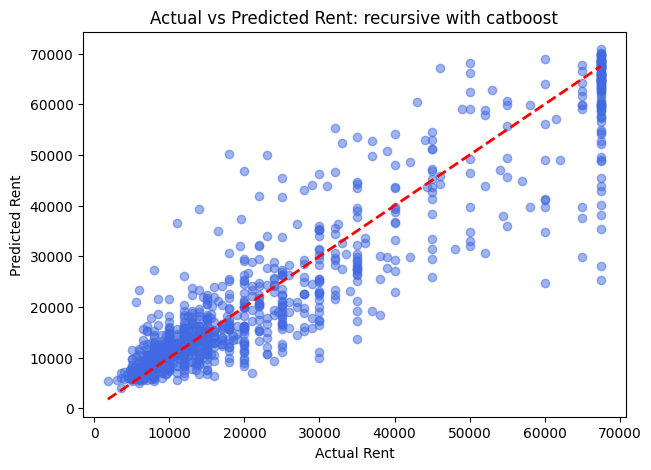

In [50]:
refcvc.make_plot_model()

In [51]:
from sklearn.feature_selection import RFECV


rfecv2 = RFECV(
    estimator=best_gboost,
    step=1,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


rfecv2.fit(x_train, y_train)


print("Selected features:", list(x_train.columns[rfecv2.support_]))


refcvc2 = modelling(rfecv,x_test, y_test, x_train, y_train,'recursive with xgboost')
refcvc2.models_evaluation()


Selected features: ['BHK', 'Size', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact', 'number_of_floors', 'current_floor']
0:	learn: 0.3154690	total: 8.87ms	remaining: 1.76s
1:	learn: 0.2952493	total: 11.1ms	remaining: 1.09s
2:	learn: 0.2766310	total: 14.3ms	remaining: 936ms
3:	learn: 0.2607091	total: 15.5ms	remaining: 761ms
4:	learn: 0.2474491	total: 17.1ms	remaining: 668ms
5:	learn: 0.2344364	total: 23.4ms	remaining: 755ms
6:	learn: 0.2237236	total: 25ms	remaining: 688ms
7:	learn: 0.2141940	total: 26.5ms	remaining: 636ms
8:	learn: 0.2072769	total: 33ms	remaining: 700ms
9:	learn: 0.1995086	total: 34.6ms	remaining: 658ms
10:	learn: 0.1932206	total: 39.6ms	remaining: 681ms
11:	learn: 0.1876468	total: 42.8ms	remaining: 670ms
12:	learn: 0.1830305	total: 44.5ms	remaining: 640ms
13:	learn: 0.1798945	total: 45.7ms	remaining: 607ms
14:	learn: 0.1764532	total: 51.4ms	remaining: 634ms
15:	learn: 0.1734968	total: 53.1ms	remaining: 610ms
16:	learn: 0.170

{'Train Score': 0.8608760065016339,
 'Test Score': 0.8191201491799789,
 'Mean Absolute Error': 0.10451922988716678,
 'Mean Squared Error': 0.01999275174567939,
 'Root Mean Squared Error': np.float64(0.1413957274661416),
 'R-squared': 0.8191201491799789}

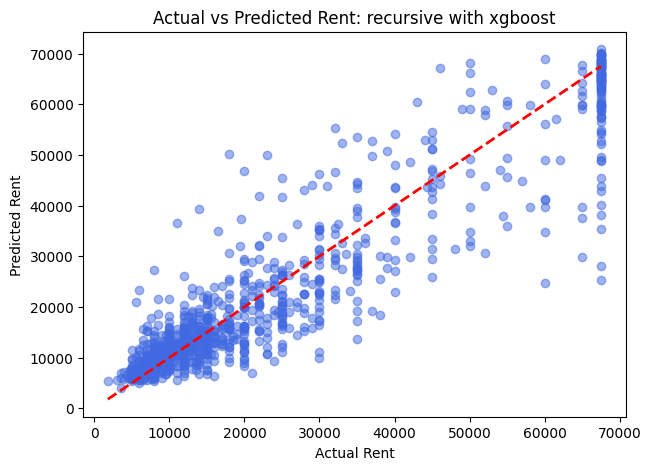

In [52]:
refcvc2.make_plot_model()

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [57]:
# linear , swish, relu, gelu, tanh, sigmoid, softmax

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model=keras.Sequential([layers.Dense(16, activation='relu'),
                            layers.Dense(16, activation='relu'),
                            layers.Dense(16, activation='relu'),
                                                 layers.Dense(1)])

    #optimizer=tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer='adam', metrics=['mae','mse'])
    return model

model=build_model()

In [58]:
# prompt: checkpoint early stopping, reduce on plateue, save best model

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=7, min_lr=0.0001)
model_checkpoint = ModelCheckpoint('mpg_regressor.keras', monitor='val_loss', save_best_only=True)

# Train the model with callbacks
history = model.fit(
    X_train,
    y_train,
    epochs=5000,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr, model_checkpoint], verbose=1
)


Epoch 1/5000
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 382.4712 - mae: 13.0293 - mse: 382.4712 - val_loss: 2.0715 - val_mae: 1.2195 - val_mse: 2.0715 - learning_rate: 0.0010
Epoch 2/5000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7398 - mae: 1.0979 - mse: 1.7398 - val_loss: 1.3280 - val_mae: 0.9262 - val_mse: 1.3280 - learning_rate: 0.0010
Epoch 3/5000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9745 - mae: 0.8000 - mse: 0.9745 - val_loss: 0.7153 - val_mae: 0.6809 - val_mse: 0.7153 - learning_rate: 0.0010
Epoch 4/5000
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5692 - mae: 0.6047 - mse: 0.5692 - val_loss: 0.4803 - val_mae: 0.5623 - val_mse: 0.4803 - learning_rate: 0.0010
Epoch 5/5000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4307 - mae: 0.5200 - mse: 0.4307 - val_loss: 0.4068 - val_mae: 0.5091 - val_mse: 0.4068 - learning_rate: 0.0010
Epoch 6/5000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3569 - mae: 0.4626 - mse: 0.3569 - val_loss: 0.3591

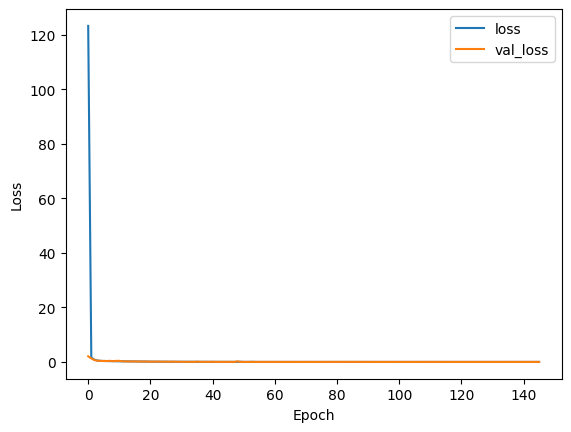

In [59]:
# plot the cureve for loss and val loss

import matplotlib.pyplot as plt
# Plot the loss and val_loss curves
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
# load best model

from keras.models import load_model

# Load the best model
model = load_model('mpg_regressor.keras')

In [61]:
test_predictions=model.predict(X_test)
test_predictions[:5]

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[4.6394024],
       [4.703244 ],
       [4.559059 ],
       [4.3082924],
       [4.81565  ]], dtype=float32)

In [62]:
loss,mae,mse=model.evaluate(X_test,y_test,verbose=0)
print('Testing mean squared error:MPG', format(mse))

Testing mean squared error:MPG 0.03097301349043846
